# EDA on mini NYC yellow taxi data

## Comments:

Taxi data was downloaded from New York Taxi and Limousine Commission (TLC). Data was separated into months and each file is almost 2GB large. In order to get a yearly representation of the data (to account for seasonality), 1% of each month's data was used.

Monthly data was downloaded and reduced from July 2015 to June 2016.

In [20]:
import pandas as pd

In [31]:
df = pd.read_csv('mini_yellow_tripdata_2015-09.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2015-09-01 00:06:28,2015-09-01 00:12:44,1,1.70,-73.955544,40.779613,1,N,-73.980408,40.788300,1,7.5,0.5,0.5,1.00,0.0,0.3,9.80
1,2,2015-09-01 00:06:59,2015-09-01 00:20:04,1,3.73,-73.937927,40.828407,1,N,-73.953239,40.785252,1,13.0,0.5,0.5,2.86,0.0,0.3,17.16
2,2,2015-09-01 00:14:36,2015-09-01 00:22:35,6,2.07,-73.966515,40.753426,1,N,-73.989021,40.741852,1,8.5,0.5,0.5,0.00,0.0,0.3,9.80
3,1,2015-09-01 00:08:00,2015-09-01 00:14:00,1,1.50,-73.988480,40.743156,1,N,-73.984924,40.758965,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30
4,2,2015-09-01 00:08:32,2015-09-01 00:22:42,1,3.59,-73.992607,40.724407,1,N,-73.980385,40.676647,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36


In [32]:
df.shape

(112250, 19)

In [33]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.00000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000,112250.000000
mean,1.531216,1.678022,3.086581,-73.014574,40.221590,1.048552,-73.070738,40.253895,1.38041,13.295983,0.316414,0.497354,1.738543,0.336917,0.299599,16.484867
std,0.499027,1.331733,3.914624,8.368819,4.609695,0.827361,8.123874,4.473295,0.50152,11.551223,0.363687,0.039790,2.509254,2.164085,0.014817,14.119899
min,1.000000,0.000000,0.000000,-121.933220,0.000000,1.000000,-121.933350,0.000000,1.00000,-150.000000,-1.000000,-0.500000,-1.360000,-15.290000,-0.300000,-150.800000
25%,1.000000,1.000000,1.020000,-73.992302,40.735241,1.000000,-73.991570,40.733891,1.00000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.760000,-73.982033,40.752434,1.000000,-73.980095,40.753021,1.00000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.250000
75%,2.000000,2.000000,3.300000,-73.966684,40.767437,1.000000,-73.962532,40.768603,2.00000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,6.000000,221.000000,0.000000,41.028450,99.000000,0.000000,41.336582,4.00000,450.000000,1.500000,0.500000,100.300000,537.290000,0.300000,617.590000


In [67]:
# Reading in monthly data sets
# Absolute paths have since been changed. So, these lines wouldn't work.
# Raw files have been moved to Github to save local space.

df_1507 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2015-07.csv')
df_1508 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2015-08.csv')
df_1509 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_tripdata_2015-09.csv')
df_1510 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2015-10.csv')
df_1511 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2015-11.csv')
df_1512 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2015-12.csv')

df_1601 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_tripdata_2016-01.csv')
df_1602 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2016-02.csv')
df_1603 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2016-03.csv')
df_1604 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini-yellow_tripdata_2016-04.csv')
df_1605 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_tripdata_2016-05.csv')
df_1606 = pd.read_csv('/Users/peidacai/Desktop/NYC_Taxi_mini_data/mini_yellow_tripdata_2016-06.csv')

In [69]:
# Creating a yearly (12 month) 1 percent mini data set

df_mini = pd.concat([df_1507, df_1508, df_1509, df_1510, df_1511, df_1512, df_1601, df_1602, df_1603, df_1604, df_1605, df_1606])
df_mini.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,1,N,-73.987389,40.733372,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
1,2,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,1,N,-74.004333,40.737984,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38
2,1,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,1,N,-73.958641,40.712761,1,12.0,0.5,0.5,2.40,0.0,0.3,15.70
3,1,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,1,N,-73.967339,40.752625,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
4,2,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,1,N,-74.010254,40.729797,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


In [71]:
# Deleting unnecessary columns

del df_mini['VendorID']
del df_mini['RatecodeID']
del df_mini['store_and_fwd_flag']
df_mini.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.10,-73.983780,40.755219,-73.987389,40.733372,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
1,2015-07-01 00:00:42,2015-07-01 00:08:27,2,1.18,-74.003471,40.725307,-74.004333,40.737984,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38
2,2015-07-01 00:01:06,2015-07-01 00:12:06,1,3.10,-74.003044,40.717903,-73.958641,40.712761,1,12.0,0.5,0.5,2.40,0.0,0.3,15.70
3,2015-07-01 00:01:29,2015-07-01 00:07:52,2,2.10,-73.982910,40.726765,-73.967339,40.752625,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
4,2015-07-01 00:01:53,2015-07-01 00:08:35,1,1.24,-74.002365,40.739746,-74.010254,40.729797,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


In [72]:
df_mini.shape

(1384127, 16)

In [73]:
# Saving concatenated file to csv on local drive
# Can't upload to Github due to size

df_mini.to_csv('mini_yellow_taxi_data_1507_1606.csv')

In [74]:
df_mini.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06,1.384127e+06
mean,1.671138e+00,3.103858e+00,-7.291844e+01,4.016935e+01,-7.297738e+01,4.020280e+01,1.360930e+00,1.299827e+01,3.229419e-01,4.973956e-01,1.767617e+00,3.234054e-01,2.996722e-01,1.620959e+01
std,1.319936e+00,9.524162e+01,8.771606e+00,4.832075e+00,8.526257e+00,4.697066e+00,4.960750e-01,1.115322e+01,4.020332e-01,3.910109e-02,2.612257e+00,1.839204e+00,1.309816e-02,1.374985e+01
min,0.000000e+00,0.000000e+00,-1.219332e+02,0.000000e+00,-1.219333e+02,0.000000e+00,1.000000e+00,-2.730000e+02,-4.500000e+00,-1.000000e+00,-1.432000e+01,-1.529000e+01,-3.000000e-01,-2.733000e+02
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073587e+01,-7.399128e+01,4.073444e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,1.000000e+00,1.700000e+00,-7.398164e+01,4.075306e+01,-7.397966e+01,4.075370e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.250000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.200000e+00,-7.396663e+01,4.076778e+01,-7.396232e+01,4.076905e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,9.000000e+00,9.915590e+04,0.000000e+00,4.468502e+01,0.000000e+00,4.892507e+01,4.000000e+00,9.655000e+02,5.000000e+01,3.000000e+00,4.000000e+02,8.000600e+02,5.400000e-01,1.260800e+03


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

%matplotlib inline

In [76]:
df= df_mini.copy()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384127 entries, 0 to 111353
Data columns (total 17 columns):
tpep_pickup_datetime     1384127 non-null object
tpep_dropoff_datetime    1384127 non-null object
passenger_count          1384127 non-null int64
trip_distance            1384127 non-null float64
pickup_longitude         1384127 non-null float64
pickup_latitude          1384127 non-null float64
dropoff_longitude        1384127 non-null float64
dropoff_latitude         1384127 non-null float64
payment_type             1384127 non-null int64
fare_amount              1384127 non-null float64
extra                    1384127 non-null float64
mta_tax                  1384127 non-null float64
tip_amount               1384127 non-null float64
tolls_amount             1384127 non-null float64
improvement_surcharge    1384127 non-null float64
total_amount             1384127 non-null float64
total_before_tips        1384127 non-null float64
dtypes: float64(13), int64(2), object(2)
mem

## Data cleaning

### Changing Date time to python datetime format

In [109]:
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']] = \
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

### Including a new feature: trip duration

In [110]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [126]:
df['trip_duration'] = df['trip_duration'].astype('timedelta64[m]')

In [127]:
df['trip_duration'].describe()

count    1.384127e+06
mean     1.543784e+01
std      7.934071e+01
min     -5.927700e+04
25%      6.000000e+00
50%      1.100000e+01
75%      1.800000e+01
max      3.686600e+04
Name: trip_duration, dtype: float64

In [131]:
# Removing negative and zero trip durations

df = df[df['trip_duration'] >0]

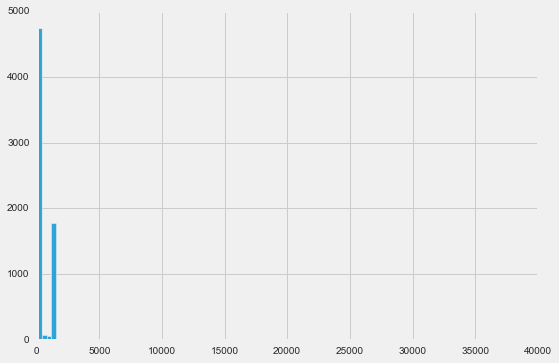

In [137]:
df[df['trip_duration'] > df.trip_duration.quantile(0.995)]['trip_duration'].hist(bins = 100)

In [148]:
# Removing trips longer than 300 minutes (5 hours)

df = df[df['trip_duration'] < 300]

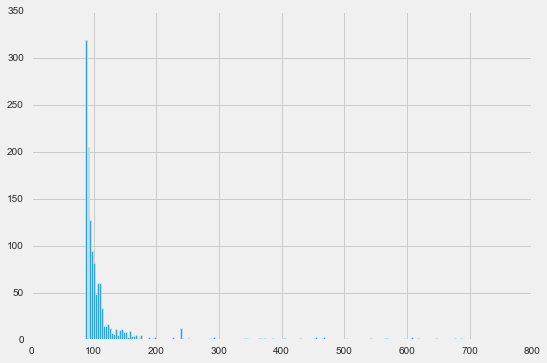

In [146]:
df[df['trip_duration'] > df.trip_duration.quantile(0.999)]['trip_duration'].hist(bins = 200)

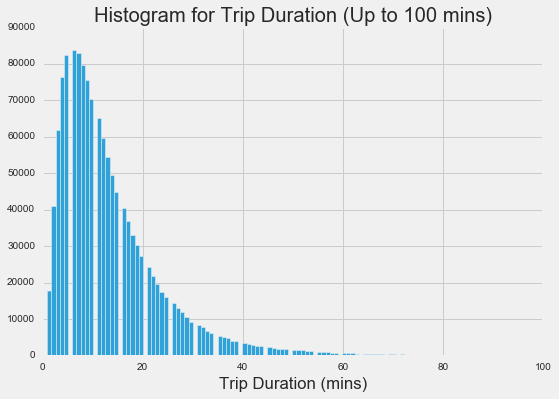

In [177]:
ax = df['trip_duration'].hist(bins = 350)
ax.set_xlim(0,100)
ax.set_xlabel('Trip Duration (mins)')
ax.set_title('Histogram for Trip Duration (Up to 100 mins)')

In [154]:
df.shape

(1370454, 19)

In [132]:
df['trip_duration'].describe()

count    1.372399e+06
mean     1.562092e+01
std      6.116962e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      1.800000e+01
max      3.686600e+04
Name: trip_duration, dtype: float64

## Passengers Count

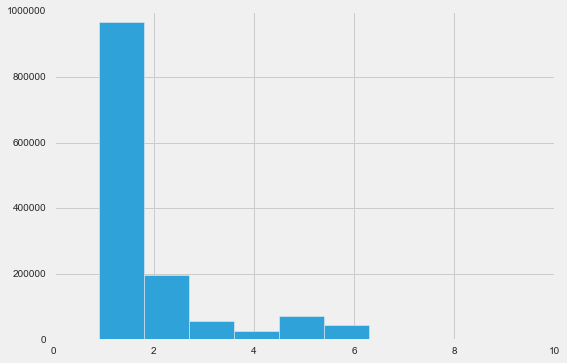

In [160]:
df['passenger_count'].hist()

## Trip Distance

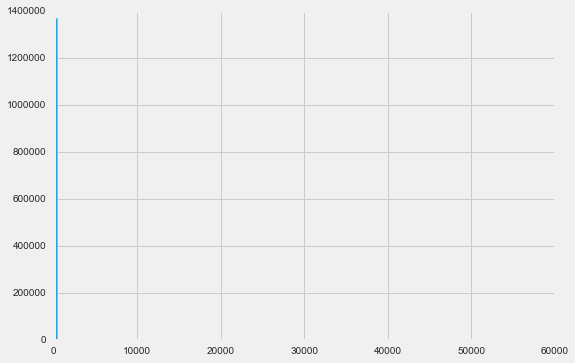

In [161]:
df['trip_distance'].hist(bins = 100)

### Comments:

There is obviously an extreme outlier with a taxi ride distance of over 9,000 miles. The [maximum straight-line distance](https://www.reference.com/geography/distance-across-united-states-f6665a323ae29d9a) in the United States is 2,802. This is over 4 times that, in a single trip.

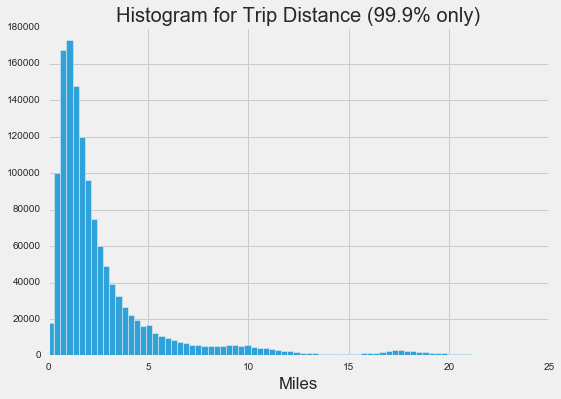

In [180]:
# Removing over 99th percentile of trip distance

ax = df[df.trip_distance < df.trip_distance.quantile(.999)]['trip_distance'].hist(bins = 80)
ax.set_title('Histogram for Trip Distance (99.9% only)')
ax.set_xlabel('Miles')
plt.vlines(x = 16, ymin=0, ymax=180000, colors = 'r', label='GA to JFK')

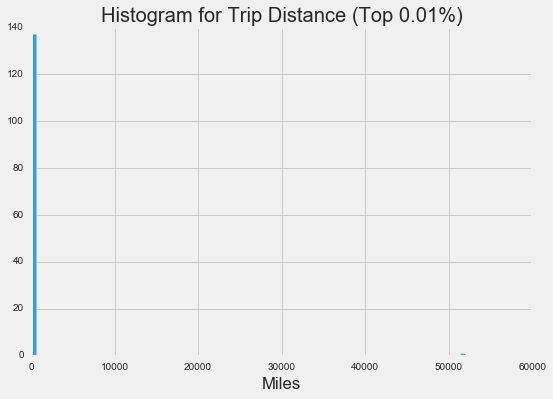

In [163]:
#df[df.trip_distance > df.trip_distance.quantile(.9999)]

ax = df[df.trip_distance > df.trip_distance.quantile(.9999)]['trip_distance'].hist(bins = 80)
ax.set_title('Histogram for Trip Distance (Top 0.01%)')
ax.set_xlabel('Miles')

In [168]:
# Inspecting entries with over 100 miles

df[df['trip_distance'] > 100]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_before_tips,tip_percentage,trip_duration
49401,2015-07-14 22:09:53,2015-07-14 23:23:37,2,154.4,-74.000824,40.743080,-74.009483,40.720684,3,2.5,0.5,0.5,0.00,0.00,0.3,3.80,3.80,0.0,73.0
59191,2015-07-17 11:28:06,2015-07-17 11:50:09,1,500.0,-73.874420,40.773975,-73.956047,40.778912,2,25.5,0.0,0.5,0.00,5.54,0.3,31.84,31.84,0.0,22.0
67454,2015-07-19 13:53:05,2015-07-19 16:27:54,3,101.6,-74.008286,40.705376,-72.378242,40.957981,2,235.0,0.0,0.0,0.00,0.00,0.3,235.30,235.30,0.0,154.0
12611,2015-08-18 11:21:08,2015-08-18 11:32:04,1,500.0,-73.953423,40.764942,-73.960861,40.773335,1,8.5,0.0,0.5,1.86,0.00,0.3,11.16,9.30,20.0,10.0
79880,2015-08-07 22:05:09,2015-08-07 22:50:36,1,179.6,-73.785179,40.648483,-73.987595,40.759922,4,52.0,0.0,0.5,0.00,11.08,0.3,63.88,63.88,0.0,45.0
81732,2015-08-08 11:16:15,2015-08-08 11:35:29,1,500.0,-73.976860,40.790520,-74.008286,40.739380,2,17.5,0.0,0.5,0.00,0.00,0.3,18.30,18.30,0.0,19.0
49095,2015-09-13 22:58:32,2015-09-14 01:06:10,1,108.7,-73.789627,40.644627,-75.255013,40.076271,2,450.0,0.0,0.0,0.00,24.41,0.3,474.71,474.71,0.0,127.0
72663,2015-09-20 04:10:47,2015-09-20 08:26:39,1,221.0,0.000000,0.000000,0.000000,0.000000,3,2.5,0.0,0.5,0.00,9.75,0.3,13.05,13.05,0.0,255.0
106139,2015-09-29 12:25:04,2015-09-29 13:09:43,2,177.4,-73.788223,40.647472,-73.995590,40.720680,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30,3.30,0.0,44.0
109716,2015-09-30 11:33:54,2015-09-30 12:09:21,1,120.4,-74.002274,40.733498,-74.178085,40.689816,1,86.0,0.0,0.5,24.13,9.75,0.3,120.68,96.55,25.0,35.0


In [94]:
df['total_before_tips'] = df['total_amount'] - df['tip_amount']
df['tip_percentage'] = (df['tip_amount'] / df['total_before_tips'])

In [167]:
df.loc[:,'tip_percentage'] = df['tip_percentage'].apply(lambda x: round((x), 1))

In [97]:
df['tip_amount'].describe()

count    1.384127e+06
mean     1.767617e+00
std      2.612257e+00
min     -1.432000e+01
25%      0.000000e+00
50%      1.250000e+00
75%      2.360000e+00
max      4.000000e+02
Name: tip_amount, dtype: float64

In [96]:
df['total_before_tips'].describe()

count    1.384127e+06
mean     1.444197e+01
std      1.213782e+01
min     -2.733000e+02
25%      7.800000e+00
50%      1.080000e+01
75%      1.580000e+01
max      1.240800e+03
Name: total_before_tips, dtype: float64

In [95]:
df['tip_percentage'].describe()

count    1.383974e+06
mean     1.244368e-01
std      1.084056e+00
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      8.333333e+02
Name: tip_percentage, dtype: float64

### Adding new feature: Average Speed

In [169]:
# In miles per hour

df['Avg_spd'] = df['trip_distance'] / (df['trip_duration'] /60)

In [170]:
df['Avg_spd'].describe()

count    1.370454e+06
mean     1.276586e+01
std      6.410663e+01
min      0.000000e+00
25%      8.100000e+00
50%      1.120000e+01
75%      1.542857e+01
max      7.428571e+04
Name: Avg_spd, dtype: float64

In [173]:
# Removing entries with average speed of over 60mph

df= df[df['Avg_spd']< 60]

In [174]:
df.shape

(1370217, 20)

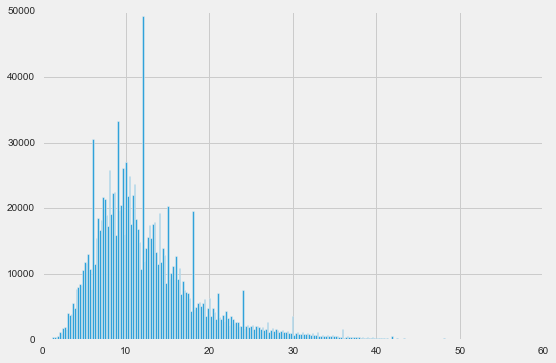

In [176]:
df['Avg_spd'].hist(bins = 300)

### Adding in rental data

In [233]:
rent = pd.read_csv('cityfeet_retail_rental.csv')
rent.head()

,Unnamed: 0,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode
0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019
1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011
2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215
3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101
4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011


In [239]:
print rent.Price_per_sf_per_year.quantile(0.33)
print rent.Price_per_sf_per_year.quantile(0.66)

22.5
45.8728


In [235]:
rent['Price_per_sf_per_year'].describe()

count    1128.000000
mean       50.333041
std        57.003063
min         0.020000
25%        18.500000
50%        31.440000
75%        60.000000
max       600.000000
Name: Price_per_sf_per_year, dtype: float64

In [240]:
rent['Price_tier'] = pd.cut(rent['Price_per_sf_per_year'], bins = [0,22.5,45.9,600], labels=['red', 'yellow', 'green'])
rent.head()

,Unnamed: 0,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode,Price_tier
0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019,green
1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011,green
2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215,yellow
3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101,yellow
4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011,green


In [241]:
rent.shape

(1128, 10)

In [242]:
# Filtering based on NYC geolocations

rent = rent[(rent['Latitude'] >= 40.492950)&(rent['Latitude'] <= 40.906282)]
rent = rent[(rent['Latitude'] >= 40.492950)&(rent['Latitude'] <= 40.906282)]

rent = rent[(rent['Longitude'] >= -74.045516)&(rent['Longitude'] <= -73.903380)]
rent = rent[(rent['Longitude'] >= -74.045516)&(rent['Longitude'] <= -73.903380)]

In [243]:
rent.shape

(462, 10)

## Scatter plotting geo data

In [181]:
df.shape

(1370217, 20)

In [210]:
df.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_before_tips,tip_percentage,trip_duration,Avg_spd
0,2015-07-01 00:00:20,2015-07-01 00:07:57,1,2.1,-73.98378,40.755219,-73.987389,40.733372,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76,9.8,20.0,7.0,18.0


In [222]:
# Removing locations outside of NYC geographical boundaries
# Latitude  [40.492950, 40.906282]
# Longitude [-74.045516, -73.903380]

df = df[(df['pickup_latitude'] >= 40.492950)&(df['pickup_latitude'] <= 40.906282)]
df = df[(df['dropoff_latitude'] >= 40.492950)&(df['dropoff_latitude'] <= 40.906282)]

df = df[(df['pickup_longitude'] >= -74.045516)&(df['pickup_longitude'] <= -73.903380)]
df = df[(df['dropoff_longitude'] >= -74.045516)&(df['dropoff_longitude'] <= -73.903380)]

In [223]:
df.shape

(1238760, 20)

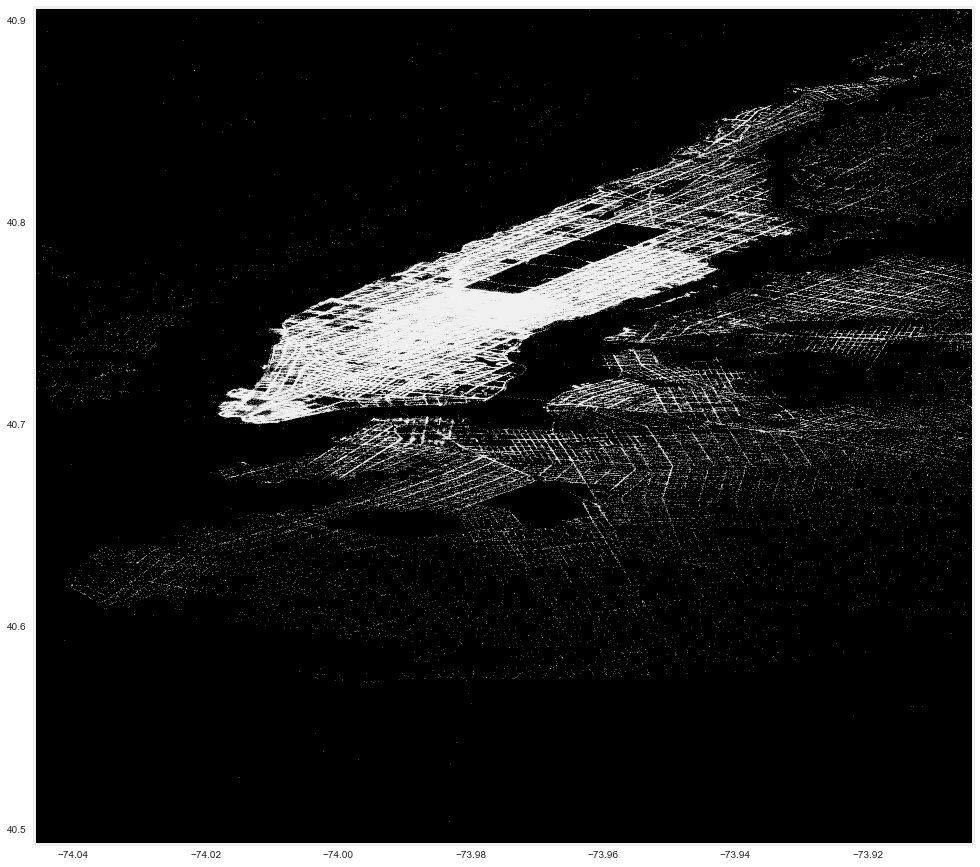

In [251]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='white', alpha = 0.2, s=0.5)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.493, 40.907);


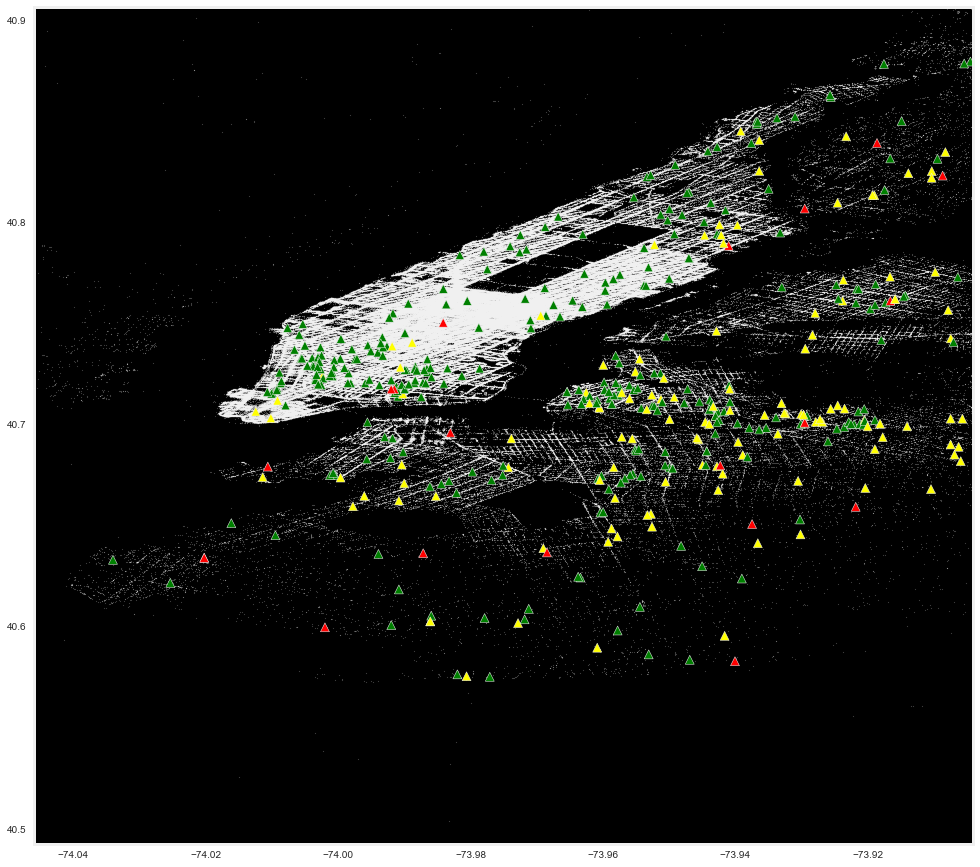

In [246]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='white', alpha = 0.2, s=0.5)

# Plotting rental locations
ax.scatter(rent['Longitude'], rent['Latitude'], c= rent['Price_tier'], marker='^', s = 80)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.493, 40.907);


### Include color spectrum for the rental prices for more information

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
rent["price_spectrum"] = MinMaxScaler().fit_transform(rent['Price_per_sf_per_year'])
rent.head()

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Unnamed: 0,Full_Street_address,SF_avail,Price_per_sf_per_year,Prop_desc,Latitude,Longitude,City,Zipcode,Price_tier,price_spectrum
0,0,"327 W 57th St, New York, NY 10019",3840,118.75,"(""Amazing Location! Perfect for Restaurant or ...",40.767498,-73.984111,New York,10019,green,0.193427
1,1,"118 West 14th Street, New York, NY 10011",4200,140.00,('Prime retail at the base of a luxury residen...,40.737628,-73.997937,New York,10011,green,0.229042
2,2,"778 Nostrand Ave, Brooklyn, NY 11215",1669,39.54,('Prime Retail Space located on the main strip...,40.672089,-73.950522,Brooklyn,11215,yellow,0.060671
3,3,"5 Court Square, Long Island City, NY 11101",3500,35.00,"('Immediate possession, 2 5 year lease term...",40.746630,-73.942833,Long Island City,11101,yellow,0.053062
4,4,"16 W 8th Street, New York, NY 10011",1163,149.61,('Excellent space steps from Washington Square...,40.732584,-73.997463,New York,10011,green,0.245148


In [254]:
def clean_sf(x):
    
    if '-' in x:
        return int(x.split('-')[1])
    else:
        return int(x)

In [255]:
rent.loc[:,'SF_avail'] = rent['SF_avail'].apply(clean_sf)

In [256]:
rent['SF_scaled'] = MinMaxScaler().fit_transform(rent['SF_avail'])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


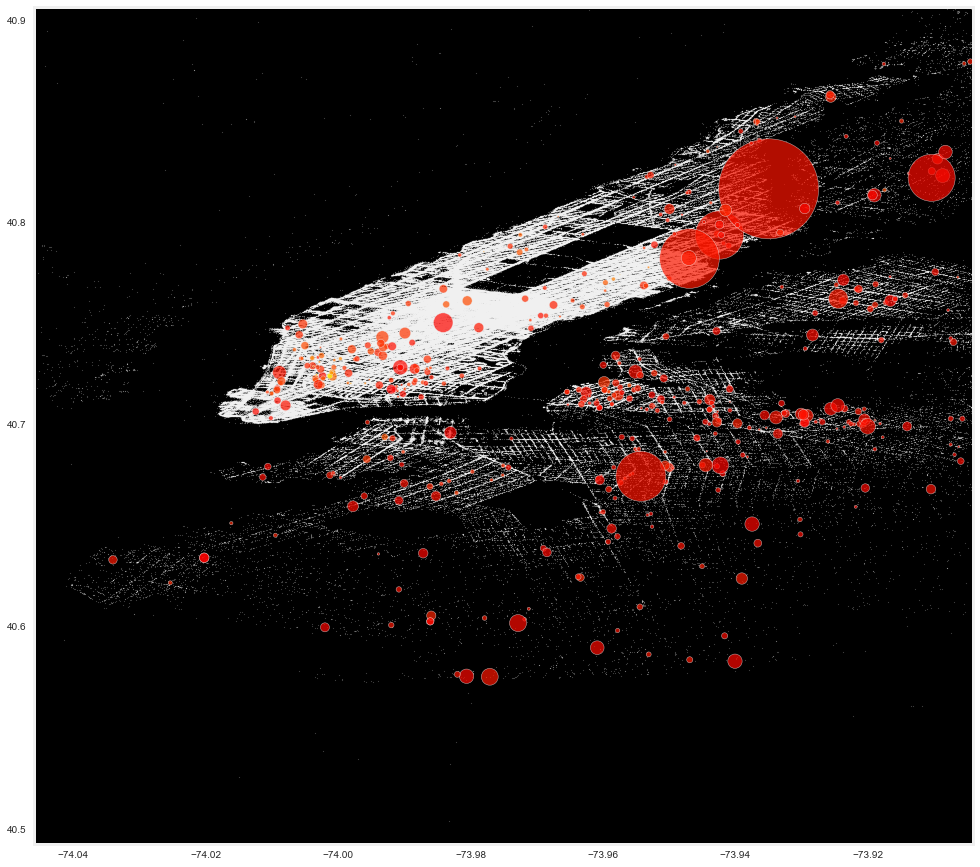

In [264]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,15))

# Plotting taxi drop off location data
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c='white', alpha = 0.2, s=0.5)

# Plotting rental locations
ax.scatter(rent['Longitude'], rent['Latitude'], c= rent['price_spectrum'], cmap = 'autumn', marker='o', s = (rent['SF_scaled']*10000), alpha = 0.7)

ax.grid(b = 'off', axis = 'both')
ax.set_axis_bgcolor('black')
ax.set_xlim(-74.046, -73.904)
ax.set_ylim(40.493, 40.907);
